In [1]:
from data_utils import *
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from UNet import *

Using TensorFlow backend.


# Load Data

In [2]:
x_train = np.load('./dataset/x_train.npy')
y_train = np.load('./dataset/y_train.npy')
x_test = np.load('./dataset/x_test.npy')
y_test = np.load('./dataset/y_test.npy')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(213, 64, 64, 1) (213, 64, 64, 1)
(54, 64, 64, 1) (54, 64, 64, 1)


# Segmentation Class U-Net

In [3]:
seg_model = UNet(img_shape = x_train[0].shape, num_of_class = 1,learning_rate = 2e-4, do_drop = True, drop_rate = 0.3)

In [4]:
seg_model.show_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 64)   36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 64)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

# Train Model

In [5]:
history = seg_model.train(x_train, y_train, epoch = 100, batch_size = 64)

Train on 170 samples, validate on 43 samples
Epoch 1/100
170/170 [==============================] - 17s 100ms/step - loss: 0.6001 - dice_coef: 0.2713 - val_loss: 0.5518 - val_dice_coef: 0.2537
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 0.5226 - dice_coef: 0.2796 - val_loss: 0.4584 - val_dice_coef: 0.3561
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4398 - dice_coef: 0.3743 - val_loss: 0.3731 - val_dice_coef: 0.4867
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 0.3561 - dice_coef: 0.4871 - val_loss: 0.2827 - val_dice_coef: 0.5572
Epoch 5/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2853 - dice_coef: 0.5908 - val_loss: 0.3421 - val_dice_coef: 0.6533
Epoch 6/100
170/170 [==============================] - 1s 4ms/step - loss: 0.3075 - dice_coef: 0.5982 - val_loss: 0.2436 - val_dice_coef: 0.5910
Epoch 7/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2358 

Epoch 57/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0494 - dice_coef: 0.9442 - val_loss: 0.0653 - val_dice_coef: 0.9376
Epoch 58/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0461 - dice_coef: 0.9445 - val_loss: 0.0691 - val_dice_coef: 0.9331
Epoch 59/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0463 - dice_coef: 0.9470 - val_loss: 0.0764 - val_dice_coef: 0.9320
Epoch 60/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0496 - dice_coef: 0.9426 - val_loss: 0.0650 - val_dice_coef: 0.9360
Epoch 61/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0464 - dice_coef: 0.9436 - val_loss: 0.0688 - val_dice_coef: 0.9335
Epoch 62/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0497 - dice_coef: 0.9444 - val_loss: 0.0729 - val_dice_coef: 0.9359
Epoch 63/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0465 - dice_coef: 0.9465 - val_loss: 0.0662 - 

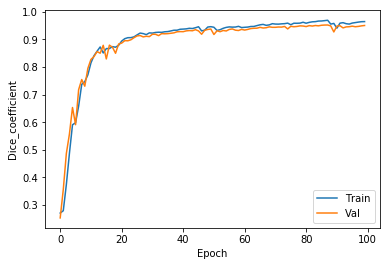

In [6]:
plot_dice(history)

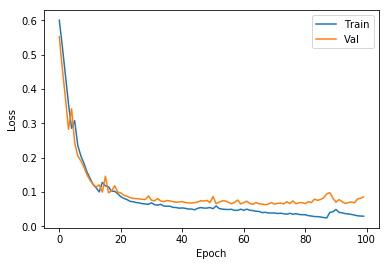

In [7]:
plot_loss(history)

# Show result

In [8]:
preds = seg_model.predict(x_test)

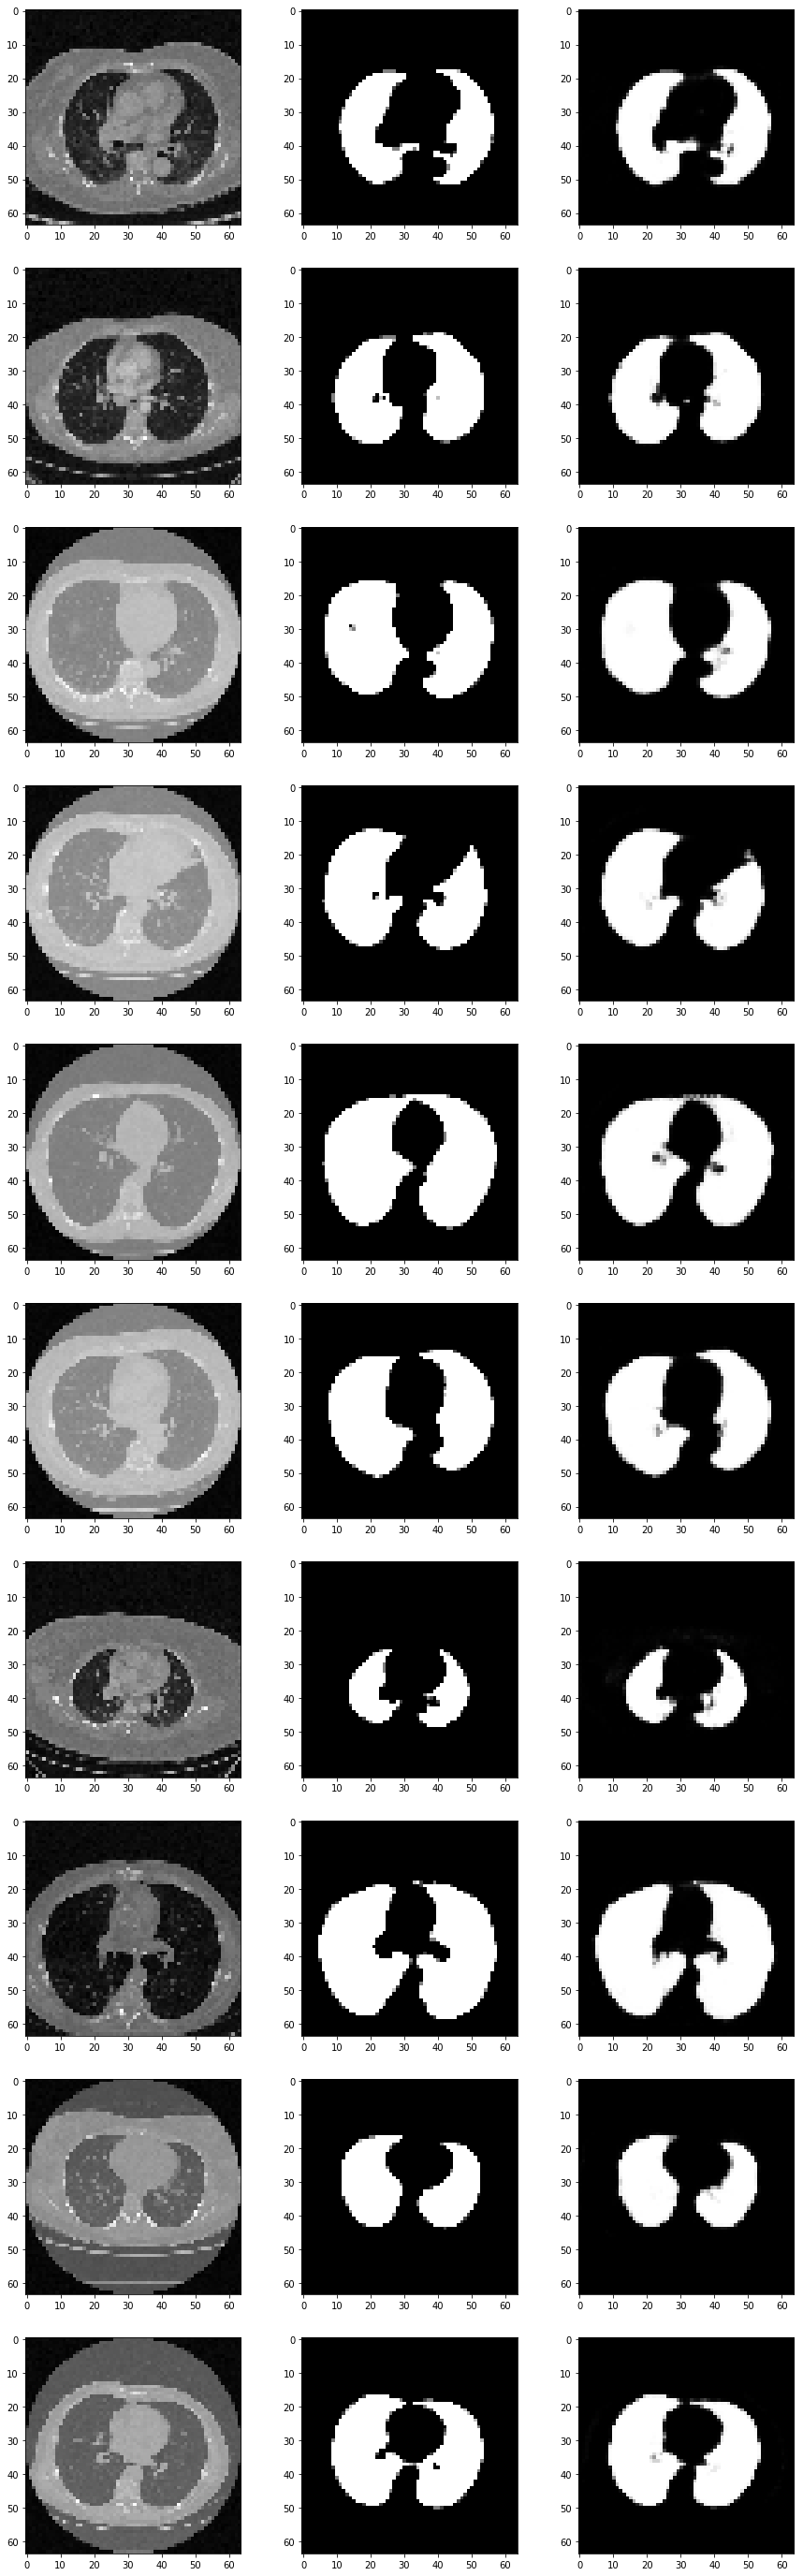

In [9]:
show_num = 10
fig, ax = plt.subplots(show_num, 3, figsize=(15, 50))

for i, pred in enumerate(preds[:show_num]):
    ax[i, 0].imshow(x_test[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_test[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')